In [1]:
using Plots, DataFrames, StatsBase, Plots.PlotMeasures, LaTeXStrings, CSV, JLD, ProgressMeter, Dates, GLM

DataDir = "../../Data/"
FigsDir = "../../Figs/"

include("Modules.jl")

theme(:dark)
Plots.default(titlefontsize=12, tickfontsize=10, labelfontsize=12, legendfontsize=9,
    rightmargin=5mm, bottommargin=5mm, topmargin=5mm, leftmargin=5mm,
    fontfamily="Computer Modern", frame=:box, label=nothing)

In [2]:
Symbols = String["ADA", "BCH", "BNB", "BTC", "DASH", "DOGE", "EOS",
    "ETC", "ETH", "LSK", "LTC", "NEO", "OMG",
    "TRX", "XEM", "XLM", "XMR", "XRP"];

CoinsData1DAY = Vector[] #Returns, CumRet, NormPrices, Times
CoinsData5MIN = Vector[] #Returns, CumRet, NormPrices, Times

CoinsDataFrame1DAY = DataFrame[]
CoinsDataFrame5MIN = DataFrame[]

for Sym ∈ Symbols
    push!(CoinsData1DAY, DataHandler.LoadData(DataDir * "Raw-Data/1DAY-USD/$Sym-USD.csv");)
end

for Sym ∈ Symbols
    push!(CoinsData5MIN, DataHandler.LoadData(DataDir * "Raw-Data/5MIN-USD/$Sym-USD.csv");)
end

for Sym ∈ Symbols
    push!(CoinsDataFrame1DAY, DataHandler.LoadDataFrame(DataDir * "Raw-Data/1DAY-USD/$Sym-USD.csv");)
end

for Sym ∈ Symbols
    push!(CoinsDataFrame5MIN, DataHandler.LoadDataFrame(DataDir * "Raw-Data/5MIN-USD/$Sym-USD.csv");)
end

In [ ]:
# CoeffMatrix = zeros(18, 18)
# for i ∈ 1:18
#     indices = setdiff(1:18, i)
#     df = DataFrame(first.(CoinsData5MIN[indices]),
#         ["X1", "X2", "X3", "X4",
#             "X5", "X6", "X7", "X8",
#             "X9", "X10", "X11", "X12",
#             "X13", "X14", "X15", "X16", "X17"])
#     df.Y = CoinsData5MIN[i][1]
#     ols = lm(@formula(Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8
#         + X9 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17), df)

In [83]:
CoeffMatrix = ones(18, 18)
for i ∈ 1:18
    indices = setdiff(1:18, i)
    Regress = [ones(length(CoinsData5MIN[i][1])) hcat(first.(CoinsData5MIN[indices])...)] \ CoinsData5MIN[i][1]
    CoeffMatrix[i, indices] = Regress[2:end]
end

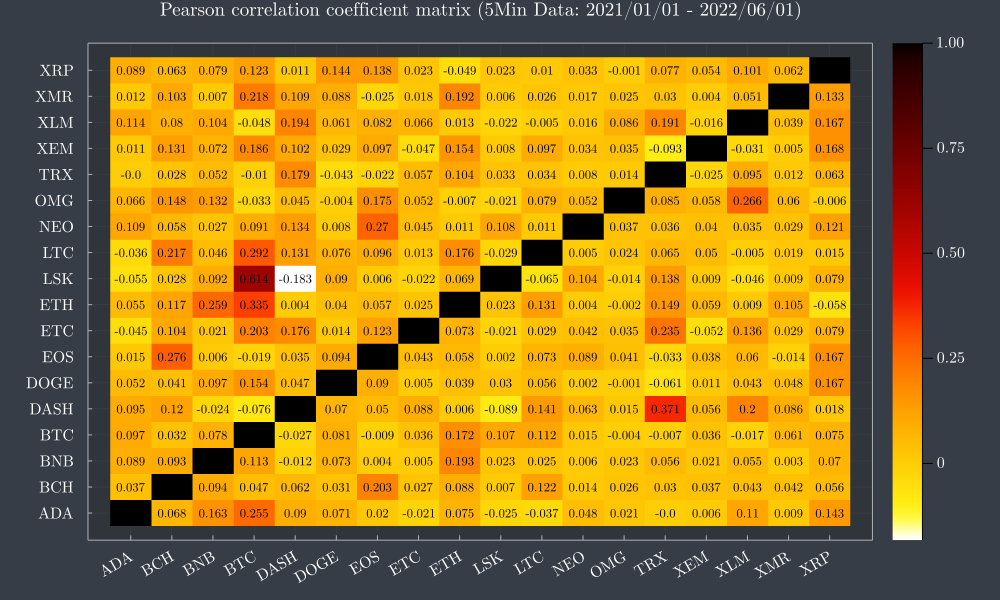

In [84]:
ShowMatrix.matrixmap(Symbols, Symbols, CoeffMatrix, annotationargs=(8, "Arial", :black), size=(1000, 600), c=cgrad(rev=true))
plot!(title="Pearson correlation coefficient matrix (5Min Data: 2021/01/01 - 2022/06/01)")

In [85]:
CoeffMatrix = ones(18, 18)
for i ∈ 1:18
    indices = setdiff(1:18, i)
    Regress = [ones(length(CoinsData1DAY[i][1])) hcat(first.(CoinsData1DAY[indices])...)] \ CoinsData1DAY[i][1]
    CoeffMatrix[i, indices] = Regress[2:end]
end

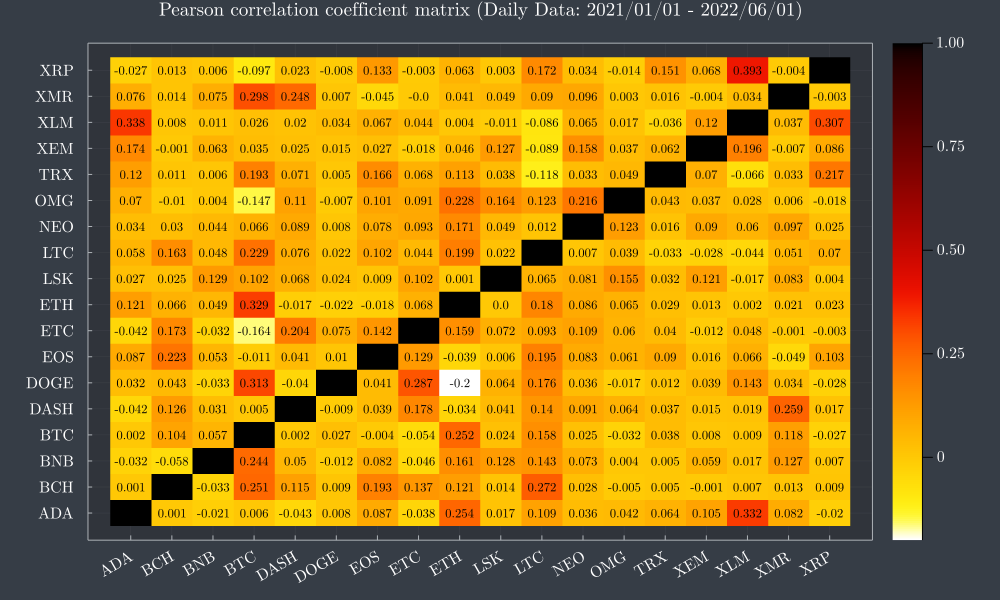

In [86]:
ShowMatrix.matrixmap(Symbols, Symbols, CoeffMatrix, annotationargs=(8, "Arial", :black), size=(1000, 600), c=cgrad(rev=true))
plot!(title="Pearson correlation coefficient matrix (Daily Data: 2021/01/01 - 2022/06/01)")